In [1]:
import os
import cv2
import ipyplot
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
import pandas as pd

In [24]:
image_path = "img2.png"
template_path = "temp.png"

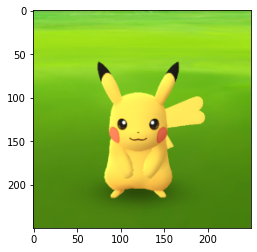

In [25]:
img = plt.imread(image_path)
plt.imshow(img)

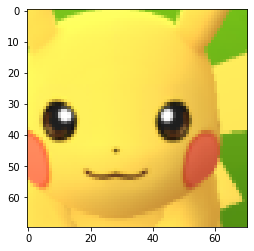

In [26]:
temp_img = plt.imread(template_path)
plt.imshow(temp_img)

In [27]:
print(img.shape)
print(temp_img.shape)

(250, 250, 4)
(70, 71, 4)


### BGRA
RGBA是代表R、G、Blue + Alpha的色彩空間

![wiki](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Hue_alpha.png/220px-Hue_alpha.png)

**alpha通道一般用作不透明度參數。**
如果一個像素的alpha通道數值為0%，那它就是完全透明的（也就是看不見的）
而數值為100%則意味著一個完全不透明的像素（傳統的數位圖像）。
在0%和100%之間的值則使得像素可以透過背景顯示出來，就像透過玻璃（半透明性），這種效果是簡單的二元透明性（透明或不透明）做不到的。它使數碼合成變得容易。alpha通道值可以用百分比、整數或者像RGB參數那樣用0到1的實數表示。

有時它也被寫成ARGB（像RGBA一樣，但是第一個數據是alpha），是Macromedia的產品使用的術語。
比如，0x80FFFF00是50%透明的黃色，因為所有的參數都在0到255的範圍內表示。0x80是128，大約是255的一半。

#### PNG是一種使用RGBA的圖像格式。

from: https://zh.wikipedia.org/wiki/RGBA

In [28]:
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGRA2BGR)

In [29]:
print(img.shape)
print(temp_img.shape)

(250, 250, 3)
(70, 71, 3)


### 做slideing window並做cosine similarity 

In [30]:
def cos_simiarity(a1, a2):
    cos_sim = np.dot(a1, a2) / (np.linalg.norm(a1) * np.linalg.norm(a2))
    return cos_sim

[95:165, 92:163]


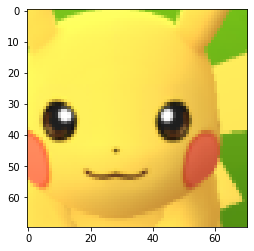

In [31]:
w = temp_img.shape[0]
h = temp_img.shape[1]

img_size = img.shape[0]

# print(w, h)

w_times = img_size-w+1
h_times = img_size-h+1

for ht in range(h_times):
    for t in range(w_times):
        part_img = np.matrix.flatten(img[t:t+w, ht:ht+h])
        part_temp = np.matrix.flatten(temp_img)
        
        cos = cos_simiarity(part_img, part_temp)
        # print(cos)
        if cos >= 0.999:
            plt.imshow(img[t:t+w, ht:ht+h])
            print('[{w_from}:{w_to}, {h_from}:{h_to}]'.format(w_from = str(t), w_to = str(t+w),
                                                             h_from = str(ht), h_to = str(ht+h)))

### 用cosine similarity去找相似效果不佳，他會去找到總和相近的，但位置可能差很多，例如:
![img](https://imgur.com/VSpYfdk.png)
使用cossimi_match的結果

In [58]:
def cossimi_match(a1, a2):
    cos_sim = np.dot(a1, a2) / (np.linalg.norm(a1) * np.linalg.norm(a2))
    if cos_sim > 0.96:
        print(cos_sim)
        return True
    else:
        return False

In [55]:
def template_match2(a1, a2):
    sim = np.sum(a1-a2)
    if sim < 3 and sim > 0:
        print(sim)
        return True
    else:
        return False

(209, 209, 3)


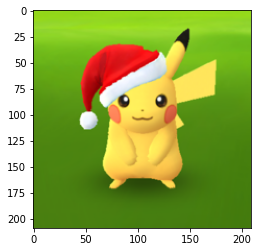

In [36]:
image2_path = "img.png"
img2 = plt.imread(image2_path)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGRA2BGR)
print(img2.shape)
plt.imshow(img2)

<Figure size 720x360 with 0 Axes>

2.698059
[71:141, 63:134]


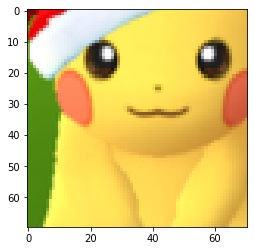

2.5137634
[77:147, 73:144]


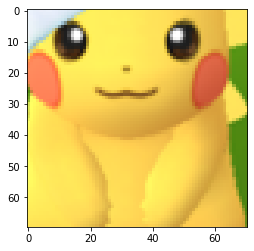

In [56]:
w = temp_img.shape[0]
h = temp_img.shape[1]

img_size_w = img2.shape[0]
img_size_h = img2.shape[1]

# print(w, h)

w_times = img_size_w-w+1
h_times = img_size_h-h+1

plt.figure(figsize=(10,5))
i = 1

for ht in range(h_times):
    for t in range(w_times):
        part_img = np.matrix.flatten(img2[t:t+w, ht:ht+h])
        part_temp = np.matrix.flatten(temp_img)
        
        cos = template_match2(part_img, part_temp)
        # print(cos)
        if cos:
            # plt.subplot(10, 5, i)
            plt.imshow(img2[t:t+w, ht:ht+h])
            print('[{w_from}:{w_to}, {h_from}:{h_to}]'.format(w_from = str(t), w_to = str(t+w),
                                                             h_from = str(ht), h_to = str(ht+h)))
            i+=1
        plt.show()